<a href="https://colab.research.google.com/github/dspselorm/Evironmental_Impact_of_Food_Production_Analysis/blob/main/Environment_Impact_of_Food_Production__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENVIRONMENTAL IMPACT OF FOOD PRODUCTION ANALYSIS**

### **GOAL**

To assess the environmental impact of food production at both macro and micro levels and propose data-driven insights to mitigate the negative effects of food production on the environment.

### **ANALYTICAL QUESTIONS**

Using the CRISP-DM Framework

1. Which foods contribute the most to greenhouse gas (CO₂ equivalent) emissions, and at which stages (land use, farm, processing, transport, packaging, retail)?

2. Which foods have the highest water footprint, and how does this correlate with their carbon footprint?

3. What is the relationship between food types and land use change emissions? Are there foods that disproportionately impact land resources?

4. At which stage of the food lifecycle (farm, processing, transport, packaging, retail) do emissions peak for most food products?

5. Can we rank foods from “most sustainable” to “least sustainable” based on combined emissions, water, and land use?

6. How do animal-based products compare to plant-based products in terms of overall environmental footprint?

### **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler

working_dir = "/content/drive/MyDrive/Azubi_TMP/Environmental_Impact_of_Food_Production_Analysis"

### **Import Google Drive Content**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Upload Datasets**

In [ ]:
df = pd.read_csv(working_dir + "/Food_Production.csv")

In [ ]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [ ]:
df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [ ]:
df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


In [ ]:
df.isnull().sum()

,0
Food product,0
Land use change,0
Animal Feed,0
Farm,0
Processing,0
Transport,0
Packging,0
Retail,0
Total_emissions,0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10


## **Begin Data Preparation**

### **Conventionalize column names**

In [ ]:
def clean_column_names(df):
    """
    Clean column names by:
    - Making them lowercase
    - Replacing spaces with underscores
    - Removing '-' characters
    - Removing parentheses
    - Avoiding double underscores
    """
    df = df.copy()
    clean_cols = []
    for col in df.columns:
        # Lowercase
        new_col = col.lower()
        # Remove parentheses
        new_col = re.sub(r"[()]", "", new_col)
        # Remove dashes
        new_col = new_col.replace("-", "")
        # Replace spaces with underscores
        new_col = new_col.strip().replace(" ", "_")
        # Remove multiple underscores
        new_col = re.sub(r"_+", "_", new_col)
        clean_cols.append(new_col)

    df.columns = clean_cols
    return df

In [ ]:
df = clean_column_names(df)
df.columns

Index(['food_product', 'land_use_change', 'animal_feed', 'farm', 'processing',
       'transport', 'packging', 'retail', 'total_emissions',
       'eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal',
       'eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram',
       'eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein',
       'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
       'freshwater_withdrawals_per_100g_protein_liters_per_100g_protein',
       'freshwater_withdrawals_per_kilogram_liters_per_kilogram',
       'greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal',
       'greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein',
       'land_use_per_1000kcal_m²_per_1000kcal',
       'land_use_per_kilogram_m²_per_kilogram',
       'land_use_per_100g_protein_m²_per_100g_protein',
       'scarcityweighted_water_use_per_kilogram_liters_per_kilogram',
       'scarcityweighted_water_use_per_100g_protein_liters_per_100g_protein',


In [ ]:
df = df.rename(columns={'packging': 'packaging'})

### **Input Missing values**

Stats for each column indicate that they have their separate distribution, thus skewness varies per column. For High skewed columns (outliers), null fields will be filled with the median, and for low skewed columns, null fields will be filled with the mean.

In [ ]:
def fill_nulls(df, skew_threshold=1):
    """
    Fill null values in numeric columns based on distribution:
    - If skewness < skew_threshold → fill with mean
    - If skewness >= skew_threshold → fill with median
    Non-numeric columns are left unchanged.
    """

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if df[col].isnull().sum() > 0:  # only check columns with nulls
            skew_val = df[col].skew()
            if abs(skew_val) < skew_threshold:
                fill_value = df[col].mean()
                method = "mean"
            else:
                fill_value = df[col].median()
                method = "median"

            df[col] = df[col].fillna(fill_value)
            print(f"Filled {col} nulls with {method} (skew={skew_val:.2f})")

    return df

In [ ]:
df_cleaned = fill_nulls(df)
df_cleaned.head()

Filled eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal nulls with median (skew=2.52)
Filled eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram nulls with median (skew=2.76)
Filled eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein nulls with median (skew=1.50)
Filled freshwater_withdrawals_per_1000kcal_liters_per_1000kcal nulls with median (skew=1.65)
Filled freshwater_withdrawals_per_100g_protein_liters_per_100g_protein nulls with median (skew=1.66)
Filled freshwater_withdrawals_per_kilogram_liters_per_kilogram nulls with median (skew=2.05)
Filled greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal nulls with median (skew=3.36)
Filled greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein nulls with median (skew=3.12)
Filled land_use_per_1000kcal_m²_per_1000kcal nulls with median (skew=3.43)
Filled land_use_per_kilogram_m²_per_kilogram nulls with median (skew=3.86)
Filled land_use_per_100g_protein_m²_per_100g_protein nulls with median (sk

,food_product,land_use_change,animal_feed,farm,processing,transport,packaging,retail,total_emissions,eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal,...,freshwater_withdrawals_per_100g_protein_liters_per_100g_protein,freshwater_withdrawals_per_kilogram_liters_per_kilogram,greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal,greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,land_use_per_1000kcal_m²_per_1000kcal,land_use_per_kilogram_m²_per_kilogram,land_use_per_100g_protein_m²_per_100g_protein,scarcityweighted_water_use_per_kilogram_liters_per_kilogram,scarcityweighted_water_use_per_100g_protein_liters_per_100g_protein,scarcityweighted_water_use_per_1000kcal_liters_per_1000_kilocalories
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.00,...,1083.325,417.1,1.35,6.50,2.98,6.865,7.94,14533.05,20917.21,17380.576
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.00,...,1083.325,417.1,1.35,6.50,2.98,6.865,7.94,14533.05,20917.21,17380.576
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.00,...,1083.325,417.1,1.35,6.50,2.98,6.865,7.94,14533.05,20917.21,17380.576
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.28,...,371.080,482.4,0.95,1.91,2.90,7.600,5.85,18786.20,14450.92,7162.100
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.51,...,3166.760,2248.4,1.21,6.27,0.76,2.800,3.94,49576.30,69825.77,13449.890


### **Round all float values to 2 decimal places**

In [ ]:
df_cleaned = df_cleaned.round({col: 2 for col in df_cleaned.select_dtypes(include='float').columns})

In [ ]:
df_cleaned

,food_product,land_use_change,animal_feed,farm,processing,transport,packaging,retail,total_emissions,eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal,...,freshwater_withdrawals_per_100g_protein_liters_per_100g_protein,freshwater_withdrawals_per_kilogram_liters_per_kilogram,greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal,greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,land_use_per_1000kcal_m²_per_1000kcal,land_use_per_kilogram_m²_per_kilogram,land_use_per_100g_protein_m²_per_100g_protein,scarcityweighted_water_use_per_kilogram_liters_per_kilogram,scarcityweighted_water_use_per_100g_protein_liters_per_100g_protein,scarcityweighted_water_use_per_1000kcal_liters_per_1000_kilocalories
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.00,...,1083.32,417.1,1.35,6.50,2.98,6.86,7.94,14533.05,20917.21,17380.58
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.00,...,1083.32,417.1,1.35,6.50,2.98,6.86,7.94,14533.05,20917.21,17380.58
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.00,...,1083.32,417.1,1.35,6.50,2.98,6.86,7.94,14533.05,20917.21,17380.58
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.28,...,371.08,482.4,0.95,1.91,2.90,7.60,5.85,18786.20,14450.92,7162.10
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.51,...,3166.76,2248.4,1.21,6.27,0.76,2.80,3.94,49576.30,69825.77,13449.89
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.75,...,347.65,59.1,0.63,2.71,1.20,0.88,5.18,2754.20,16201.18,3762.57
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.71,...,1083.32,0.0,1.36,14.67,1.86,1.81,20.11,0.00,20917.21,17380.58
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.82,...,1083.32,620.1,0.91,6.50,0.58,2.04,7.94,16438.60,20917.21,4683.36
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.54,...,1083.32,217.7,0.52,6.50,0.52,1.83,7.94,9493.30,20917.21,2704.64
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.01,...,203.50,435.7,0.52,0.84,4.57,15.57,7.27,22477.40,10498.55,17380.58


In [ ]:
# Save final cleaned dataset to drive
df_cleaned.to_csv(working_dir + "/Food_Production_Cleaned.csv", index=False)

## **Load Fully Cleaned Dataset to begin Visualizations and Analysis**

---



In [ ]:
df_cleaned = pd.read_csv(working_dir + "/Food_Production_Cleaned.csv")

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   food_product                                                          43 non-null     object 
 1   land_use_change                                                       43 non-null     float64
 2   animal_feed                                                           43 non-null     float64
 3   farm                                                                  43 non-null     float64
 4   processing                                                            43 non-null     float64
 5   transport                                                             43 non-null     float64
 6   packaging                                                             43 non-null     float64
 7   r

## **VISUALIZATIONS AND ANALYSIS**

### **1. Which foods contribute the most to greenhouse gas (CO₂ equivalent) emissions, and at which stages (land use, farm, processing, transport, packaging, retail)?**

In [ ]:
df_cleaned.columns

Index(['food_product', 'land_use_change', 'animal_feed', 'farm', 'processing',
       'transport', 'packaging', 'retail', 'total_emissions',
       'eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal',
       'eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram',
       'eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein',
       'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
       'freshwater_withdrawals_per_100g_protein_liters_per_100g_protein',
       'freshwater_withdrawals_per_kilogram_liters_per_kilogram',
       'greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal',
       'greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein',
       'land_use_per_1000kcal_m²_per_1000kcal',
       'land_use_per_kilogram_m²_per_kilogram',
       'land_use_per_100g_protein_m²_per_100g_protein',
       'scarcityweighted_water_use_per_kilogram_liters_per_kilogram',
       'scarcityweighted_water_use_per_100g_protein_liters_per_100g_protein',

In [ ]:
emission_cols = [
    'land_use_change',
    'animal_feed',
    'farm',
    'processing',
    'transport',
    'packaging',
    'retail'
]

# Calculate sum of emissions from stage columns
df_cleaned['calculated_total'] = df_cleaned[emission_cols].sum(axis=1)

# Check if total_emissions matches calculated sum
df_cleaned['match'] = df_cleaned['total_emissions'].round(5) == df_cleaned['calculated_total'].round(5)

# Display mismatches (if any)
mismatches = df_cleaned.loc[~df_cleaned['match'], ['food_product', 'total_emissions', 'calculated_total']]
print("Mismatches (if any):")
print(mismatches)

Mismatches (if any):
Empty DataFrame
Columns: [food_product, total_emissions, calculated_total]
Index: []


In [ ]:
# List of emission stage columns
emission_cols = [
    'land_use_change',
    'animal_feed',
    'farm',
    'processing',
    'transport',
    'packaging',
    'retail'
]

# Get top 10 by total emissions
top_emitters = df_cleaned[['food_product', 'total_emissions'] + emission_cols] \
                .sort_values(by='total_emissions', ascending=False) \
                .head(5)

top_emitters

,food_product,total_emissions,land_use_change,animal_feed,farm,processing,transport,packaging,retail
33,Beef (beef herd),59.6,16.3,1.9,39.4,1.3,0.3,0.2,0.2
35,Lamb & Mutton,24.5,0.5,2.4,19.5,1.1,0.5,0.3,0.2
39,Cheese,21.2,4.5,2.3,13.1,0.7,0.1,0.2,0.3
34,Beef (dairy herd),21.1,0.9,2.5,15.7,1.1,0.4,0.3,0.2
32,Dark Chocolate,18.7,14.3,0.0,3.7,0.2,0.1,0.4,0.0


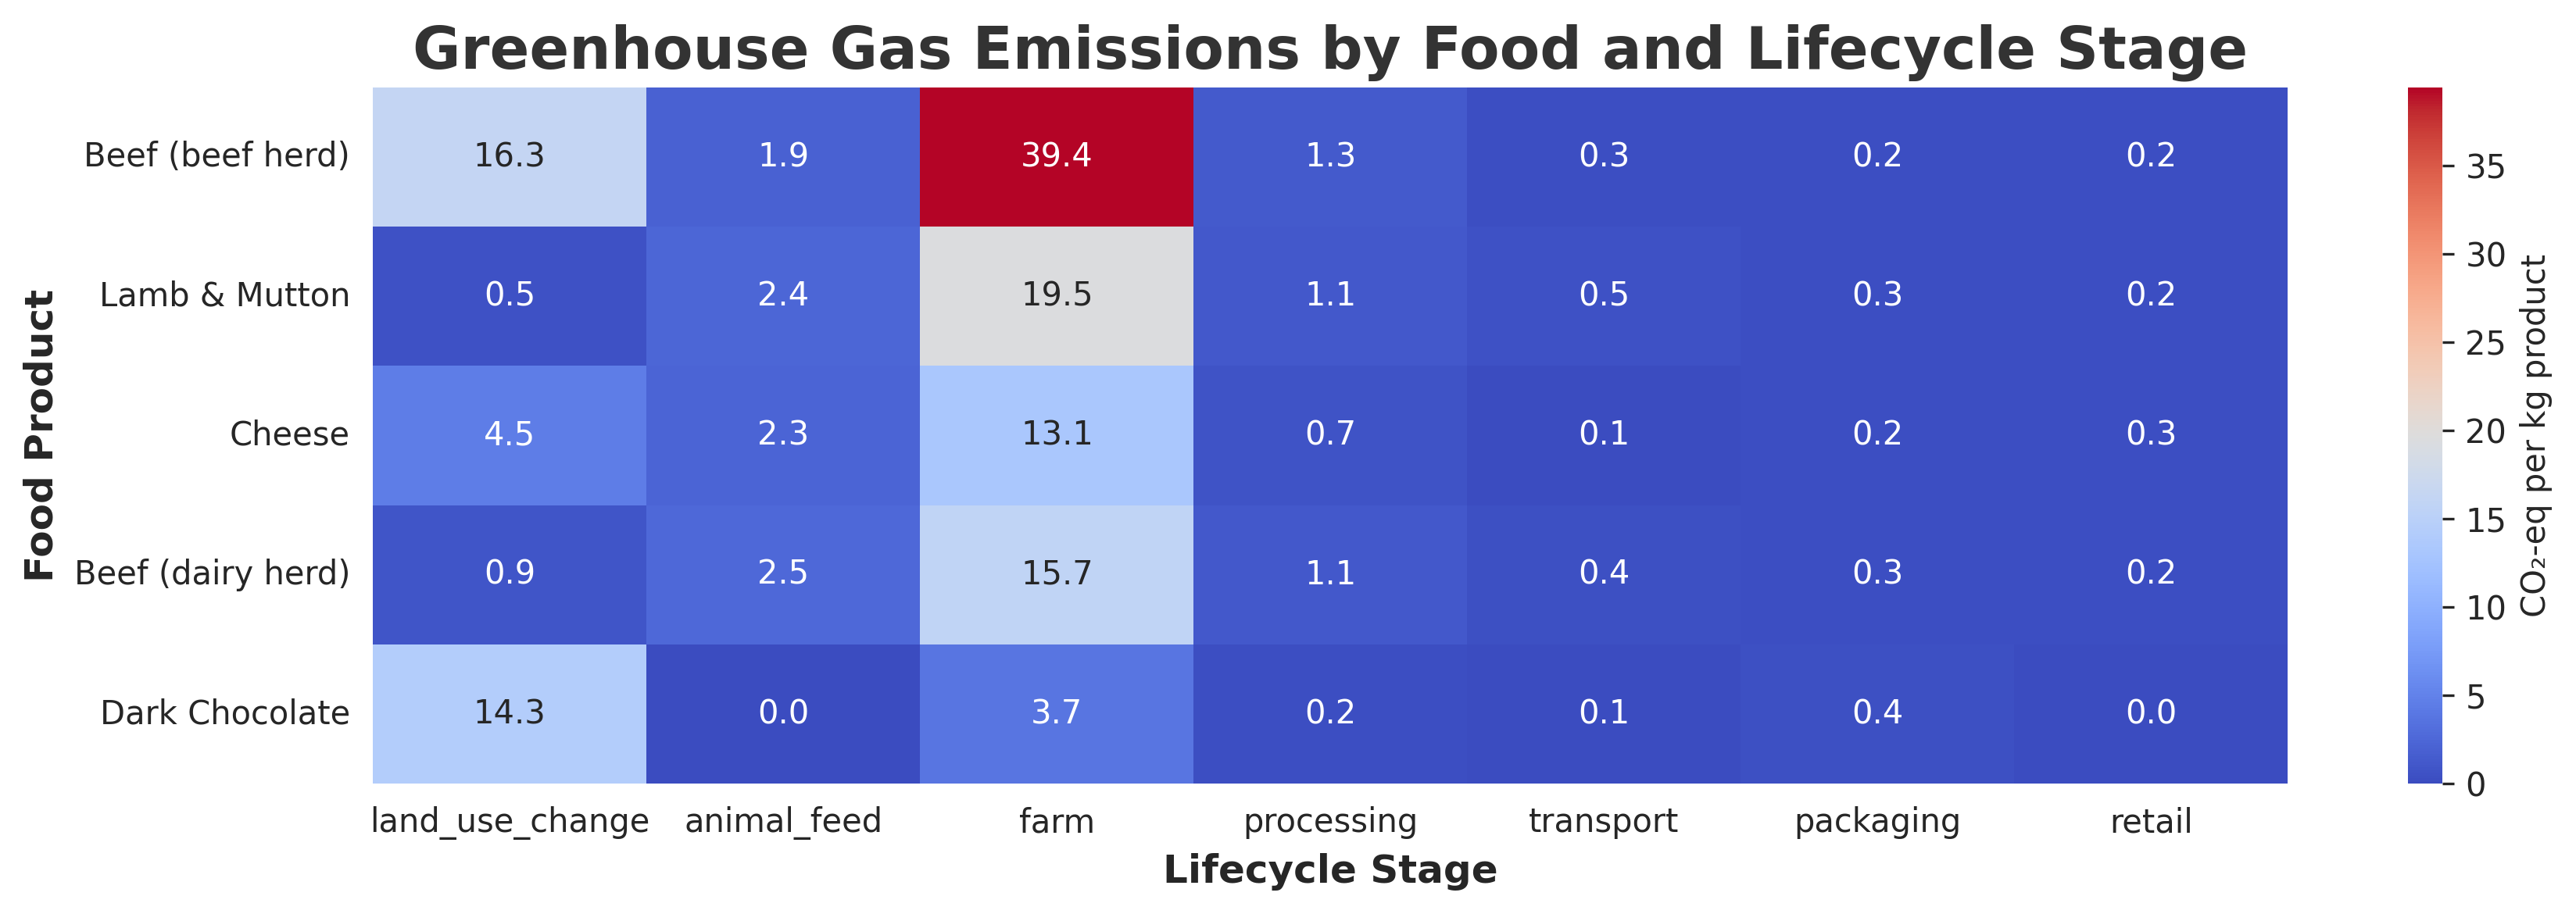

In [ ]:
heat_df = top_emitters.set_index('food_product')[emission_cols]

plt.figure(figsize=(12, 4), dpi=300)
sns.heatmap(heat_df, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'CO₂-eq per kg product'})

plt.title("Greenhouse Gas Emissions by Food and Lifecycle Stage", fontsize=18, weight='bold', color='#333')
plt.xlabel("Lifecycle Stage", fontsize=12, weight='bold')
plt.ylabel("Food Product", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

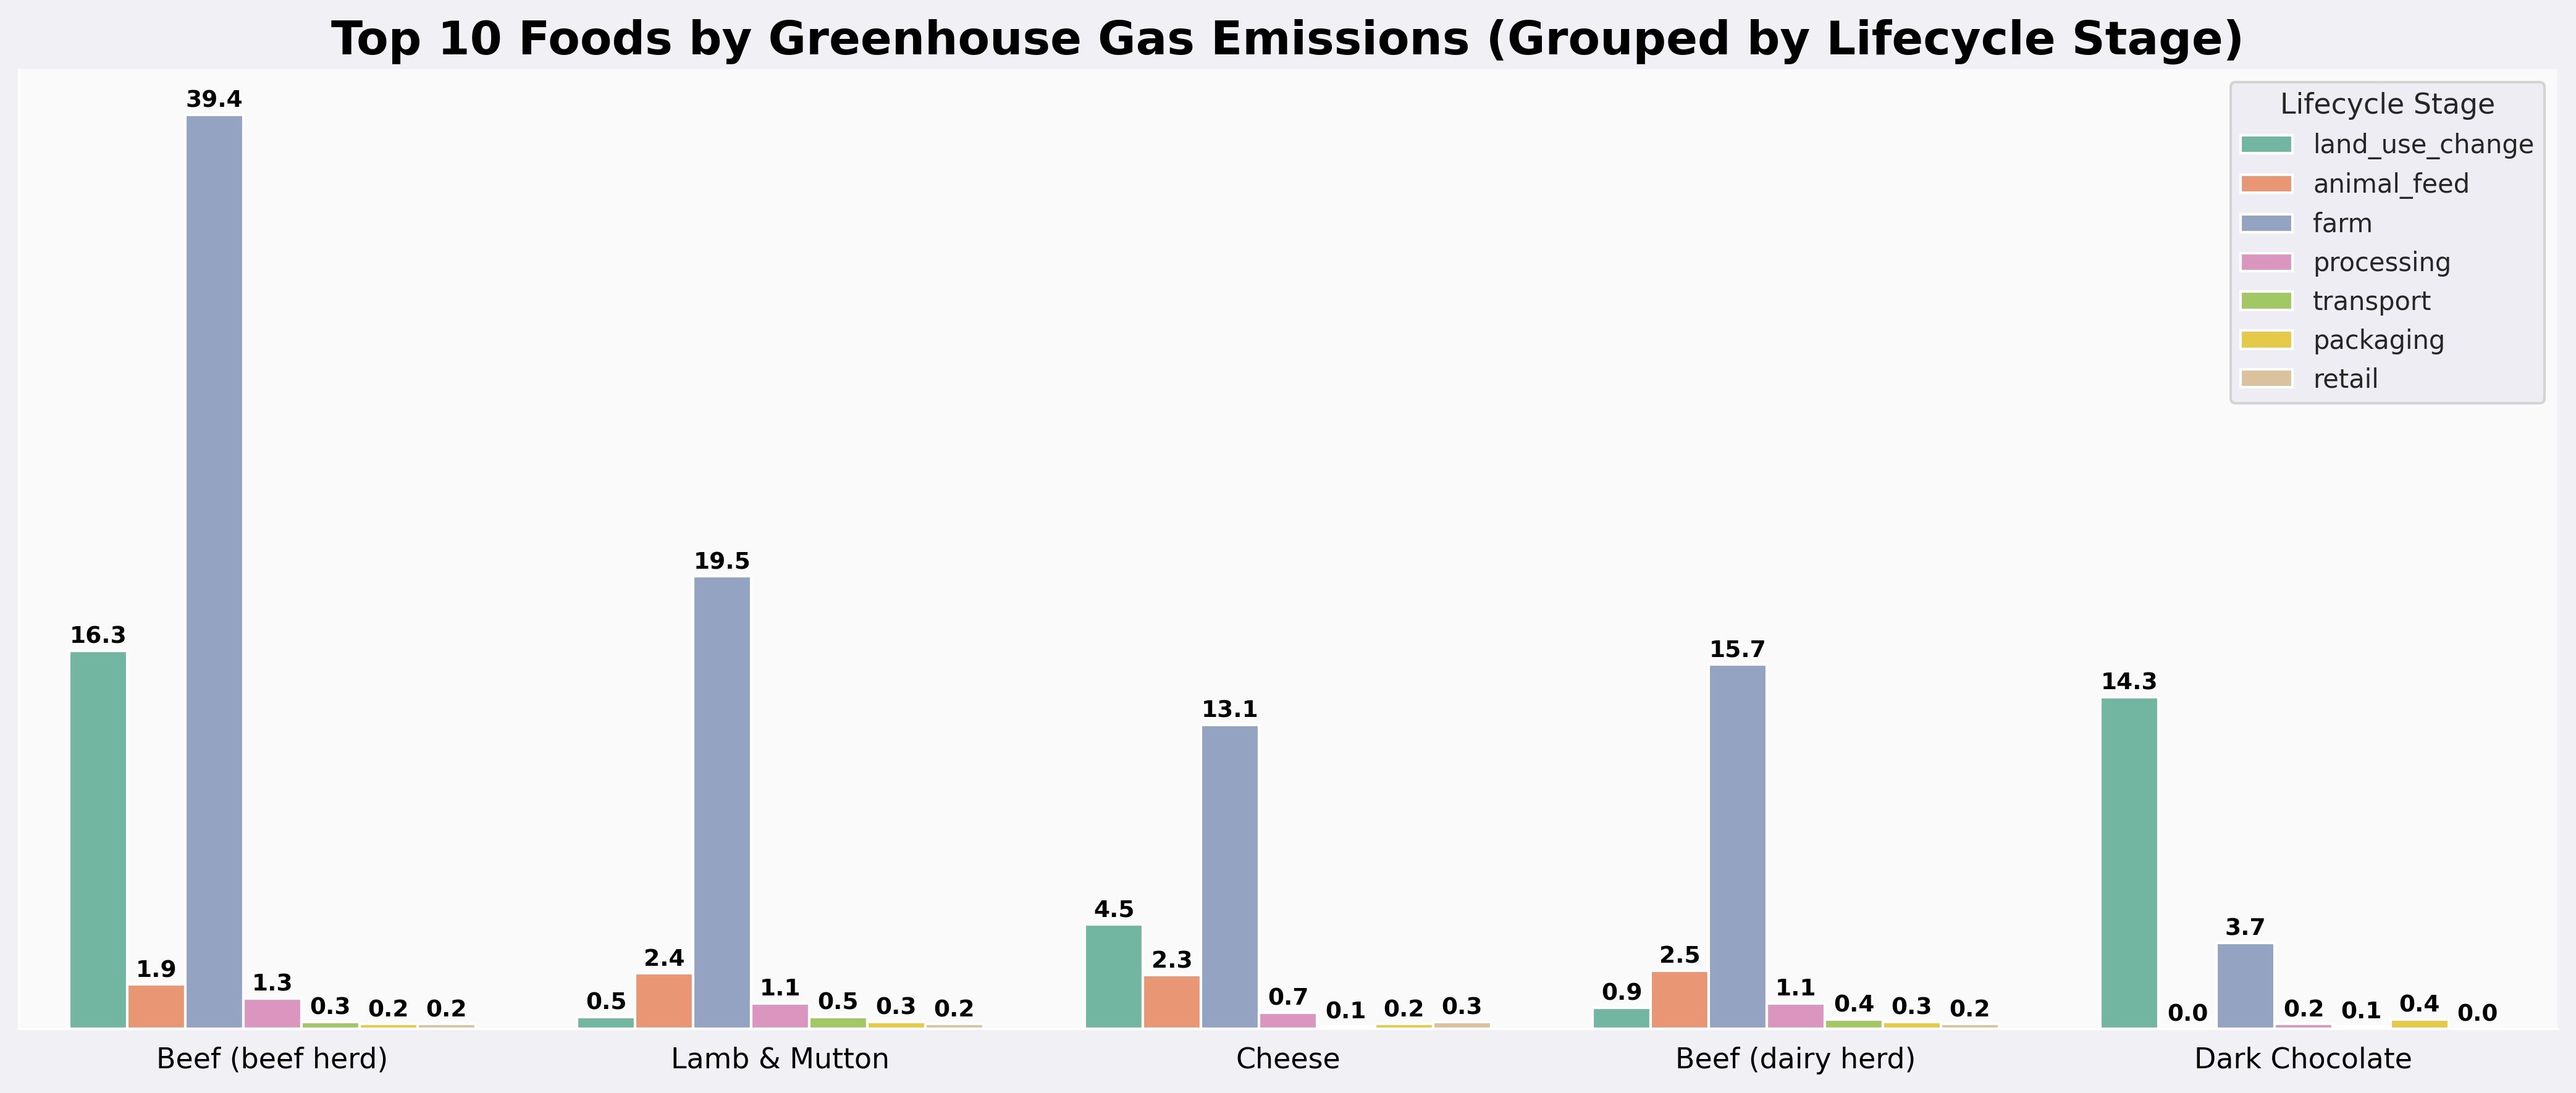

In [ ]:
# Reshape data for grouped column chart
plot_df = top_emitters.melt(
    id_vars=['food_product', 'total_emissions'],
    value_vars=emission_cols,
    var_name='Stage',
    value_name='Emissions'
)

# Use Seaborn "darkgrid" style for a clean grouped column look
sns.set_style("darkgrid")
plt.figure(figsize=(14, 6), dpi=300)

# Grouped column chart
bar = sns.barplot(
    data=plot_df,
    x='food_product', y='Emissions', hue='Stage',
    palette='Set2'
)

# Add data labels
for container in bar.containers:
    bar.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=1, weight='bold', color='#000')

# Titles and styling
plt.title("Top 10 Foods by Greenhouse Gas Emissions (Grouped by Lifecycle Stage)",
          fontsize=18, weight='bold', color='#000')
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=11, color='#000')
plt.yticks([])
plt.legend(title='Lifecycle Stage', fontsize=10, title_fontsize=11, loc='upper right', bbox_to_anchor=(1, 1))
plt.gca().set_facecolor('#fafafa')
plt.gcf().set_facecolor('#f0f0f5')
sns.despine()

# Save and show
plt.tight_layout()
plt.savefig(working_dir + "/top5_foods_grouped_column.png", dpi=300, bbox_inches='tight')
plt.show()

Greenhouse gas emissions are overwhelmingly driven by farm-stage activities and
land use change, especially for livestock-based foods.

Targeting agricultural practices and land management offers the greatest potential for reducing emissions.

### **2. Which foods have the highest water footprint, and how does this correlate with their carbon footprint?**

Correlation between water footprint and carbon footprint: 0.33


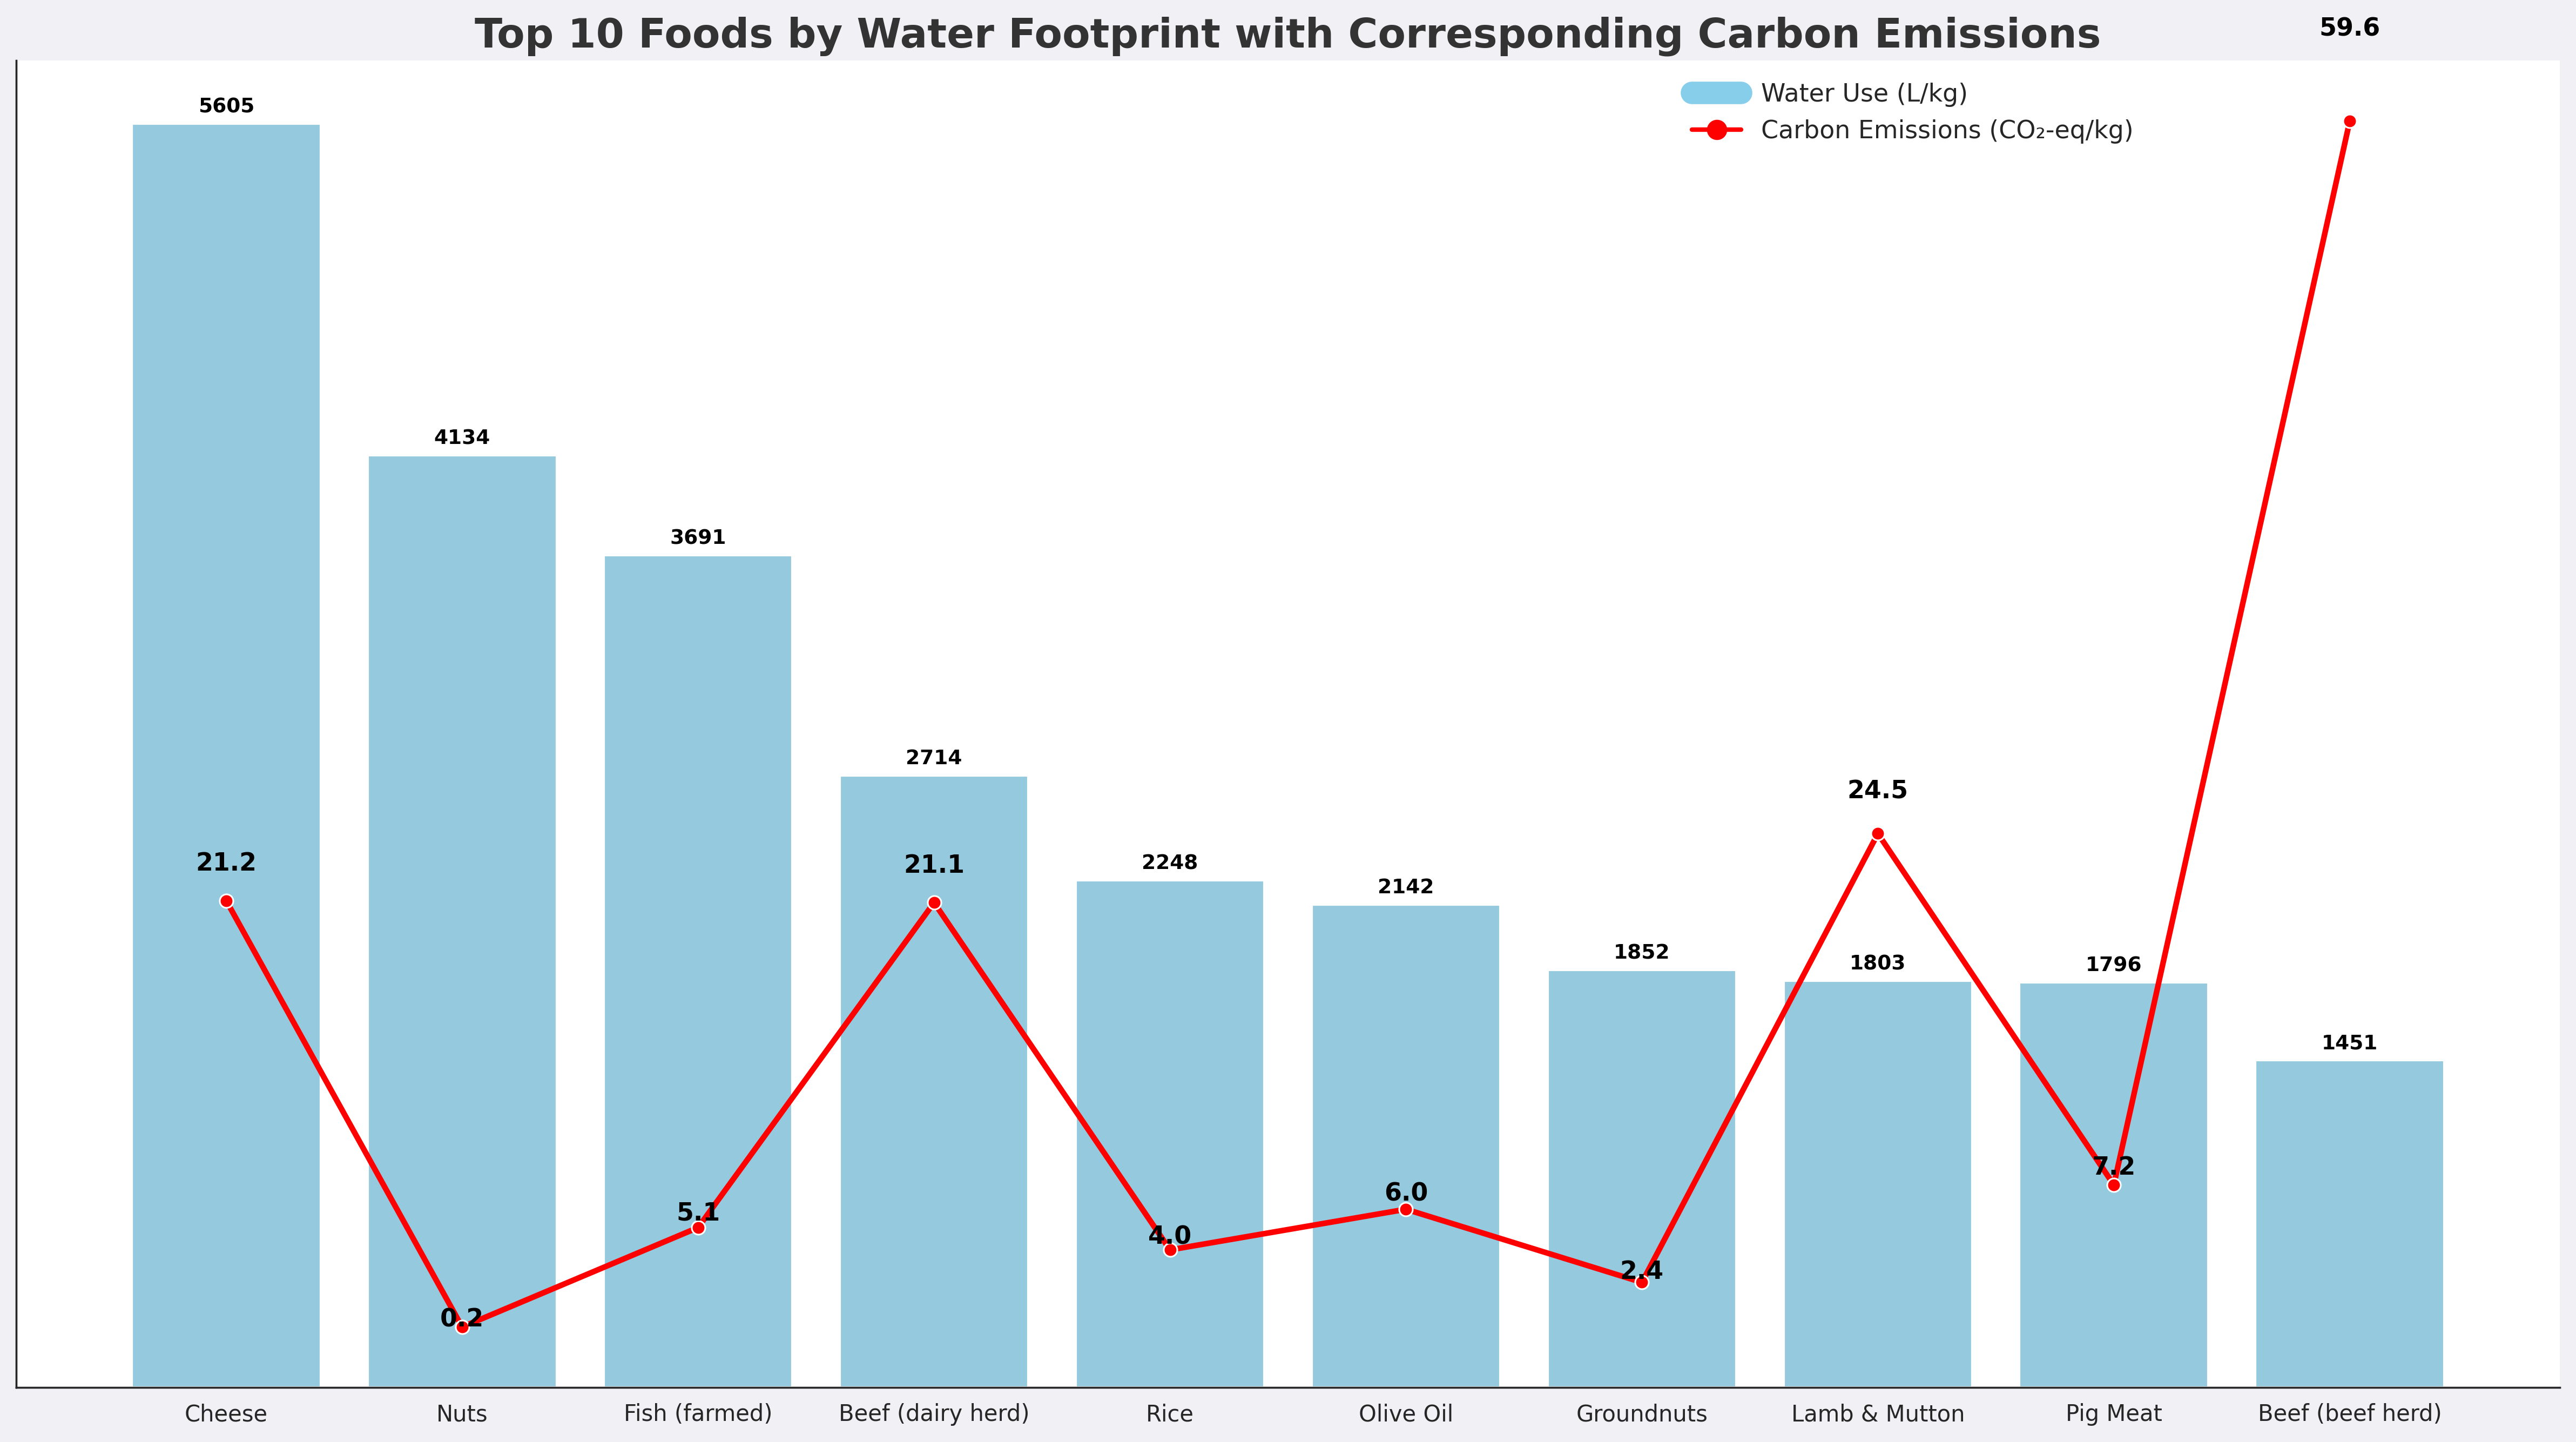

In [ ]:
# Columns
water_col = 'freshwater_withdrawals_per_kilogram_liters_per_kilogram'
carbon_col = 'total_emissions'

# Top 10 foods by water footprint
top_water = df_cleaned[['food_product', water_col, carbon_col]] \
    .sort_values(by=water_col, ascending=False) \
    .head(10)

# Correlation
correlation = df_cleaned[[water_col, carbon_col]].corr().iloc[0, 1]
print(f"Correlation between water footprint and carbon footprint: {correlation:.2f}")

# Plot
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(16, 9), dpi=300)

# Bar plot for water footprint
bar = sns.barplot(
    data=top_water,
    x='food_product', y=water_col,
    color='skyblue', ax=ax1
)

# Add labels to bars
for container in bar.containers:
    bar.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=3, color='black', weight='bold')

# Line plot for carbon emissions
ax2 = ax1.twinx()
sns.lineplot(
    data=top_water,
    x='food_product', y=carbon_col,
    color='red', marker='o', linewidth=2.5, ax=ax2, label='Carbon Emissions (CO₂-eq/kg)'
)

# Add labels to line points (pushed higher)
for x, y in enumerate(top_water[carbon_col]):
    ax2.text(x, y + (y * 0.07), f"{y:.1f}", ha='center', fontsize=11, color='#000', weight='bold')

# Remove gridlines, y-ticks, and y-axis titles
ax1.grid(False)
ax2.grid(False)
ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")

# Legend for both metrics
bars = plt.Line2D([0], [0], color='skyblue', lw=10)
lines = plt.Line2D([0], [0], color='red', marker='o', markersize=8, lw=2)
plt.legend(
    [bars, lines], ['Water Use (L/kg)', 'Carbon Emissions (CO₂-eq/kg)'],
    fontsize=11, loc='upper left', bbox_to_anchor=(0.65, 1), frameon=False
)

# Title & Style
plt.title("Top 10 Foods by Water Footprint with Corresponding Carbon Emissions",
          fontsize=18, weight='bold', color='#333')
plt.xlabel("")
plt.xticks(rotation=45, fontsize=11)
plt.gca().set_facecolor('#fafafa')
plt.gcf().set_facecolor('#f0f0f5')
sns.despine()

# Save & Show
plt.tight_layout()
plt.savefig(working_dir + "/top10_water_vs_carbon.png", dpi=300, bbox_inches='tight')
plt.show()


•	Water footprint and carbon emissions show only a moderate correlation (0.33), meaning one metric alone doesn’t capture full environmental impact.

•	Beef remains the highest emissions driver, while Cheese and Nuts dominate water use, emphasizing multi-factor sustainability assessments.

### **3. What is the relationship between food types and land use change emissions? Are there foods that disproportionately impact land resources?**

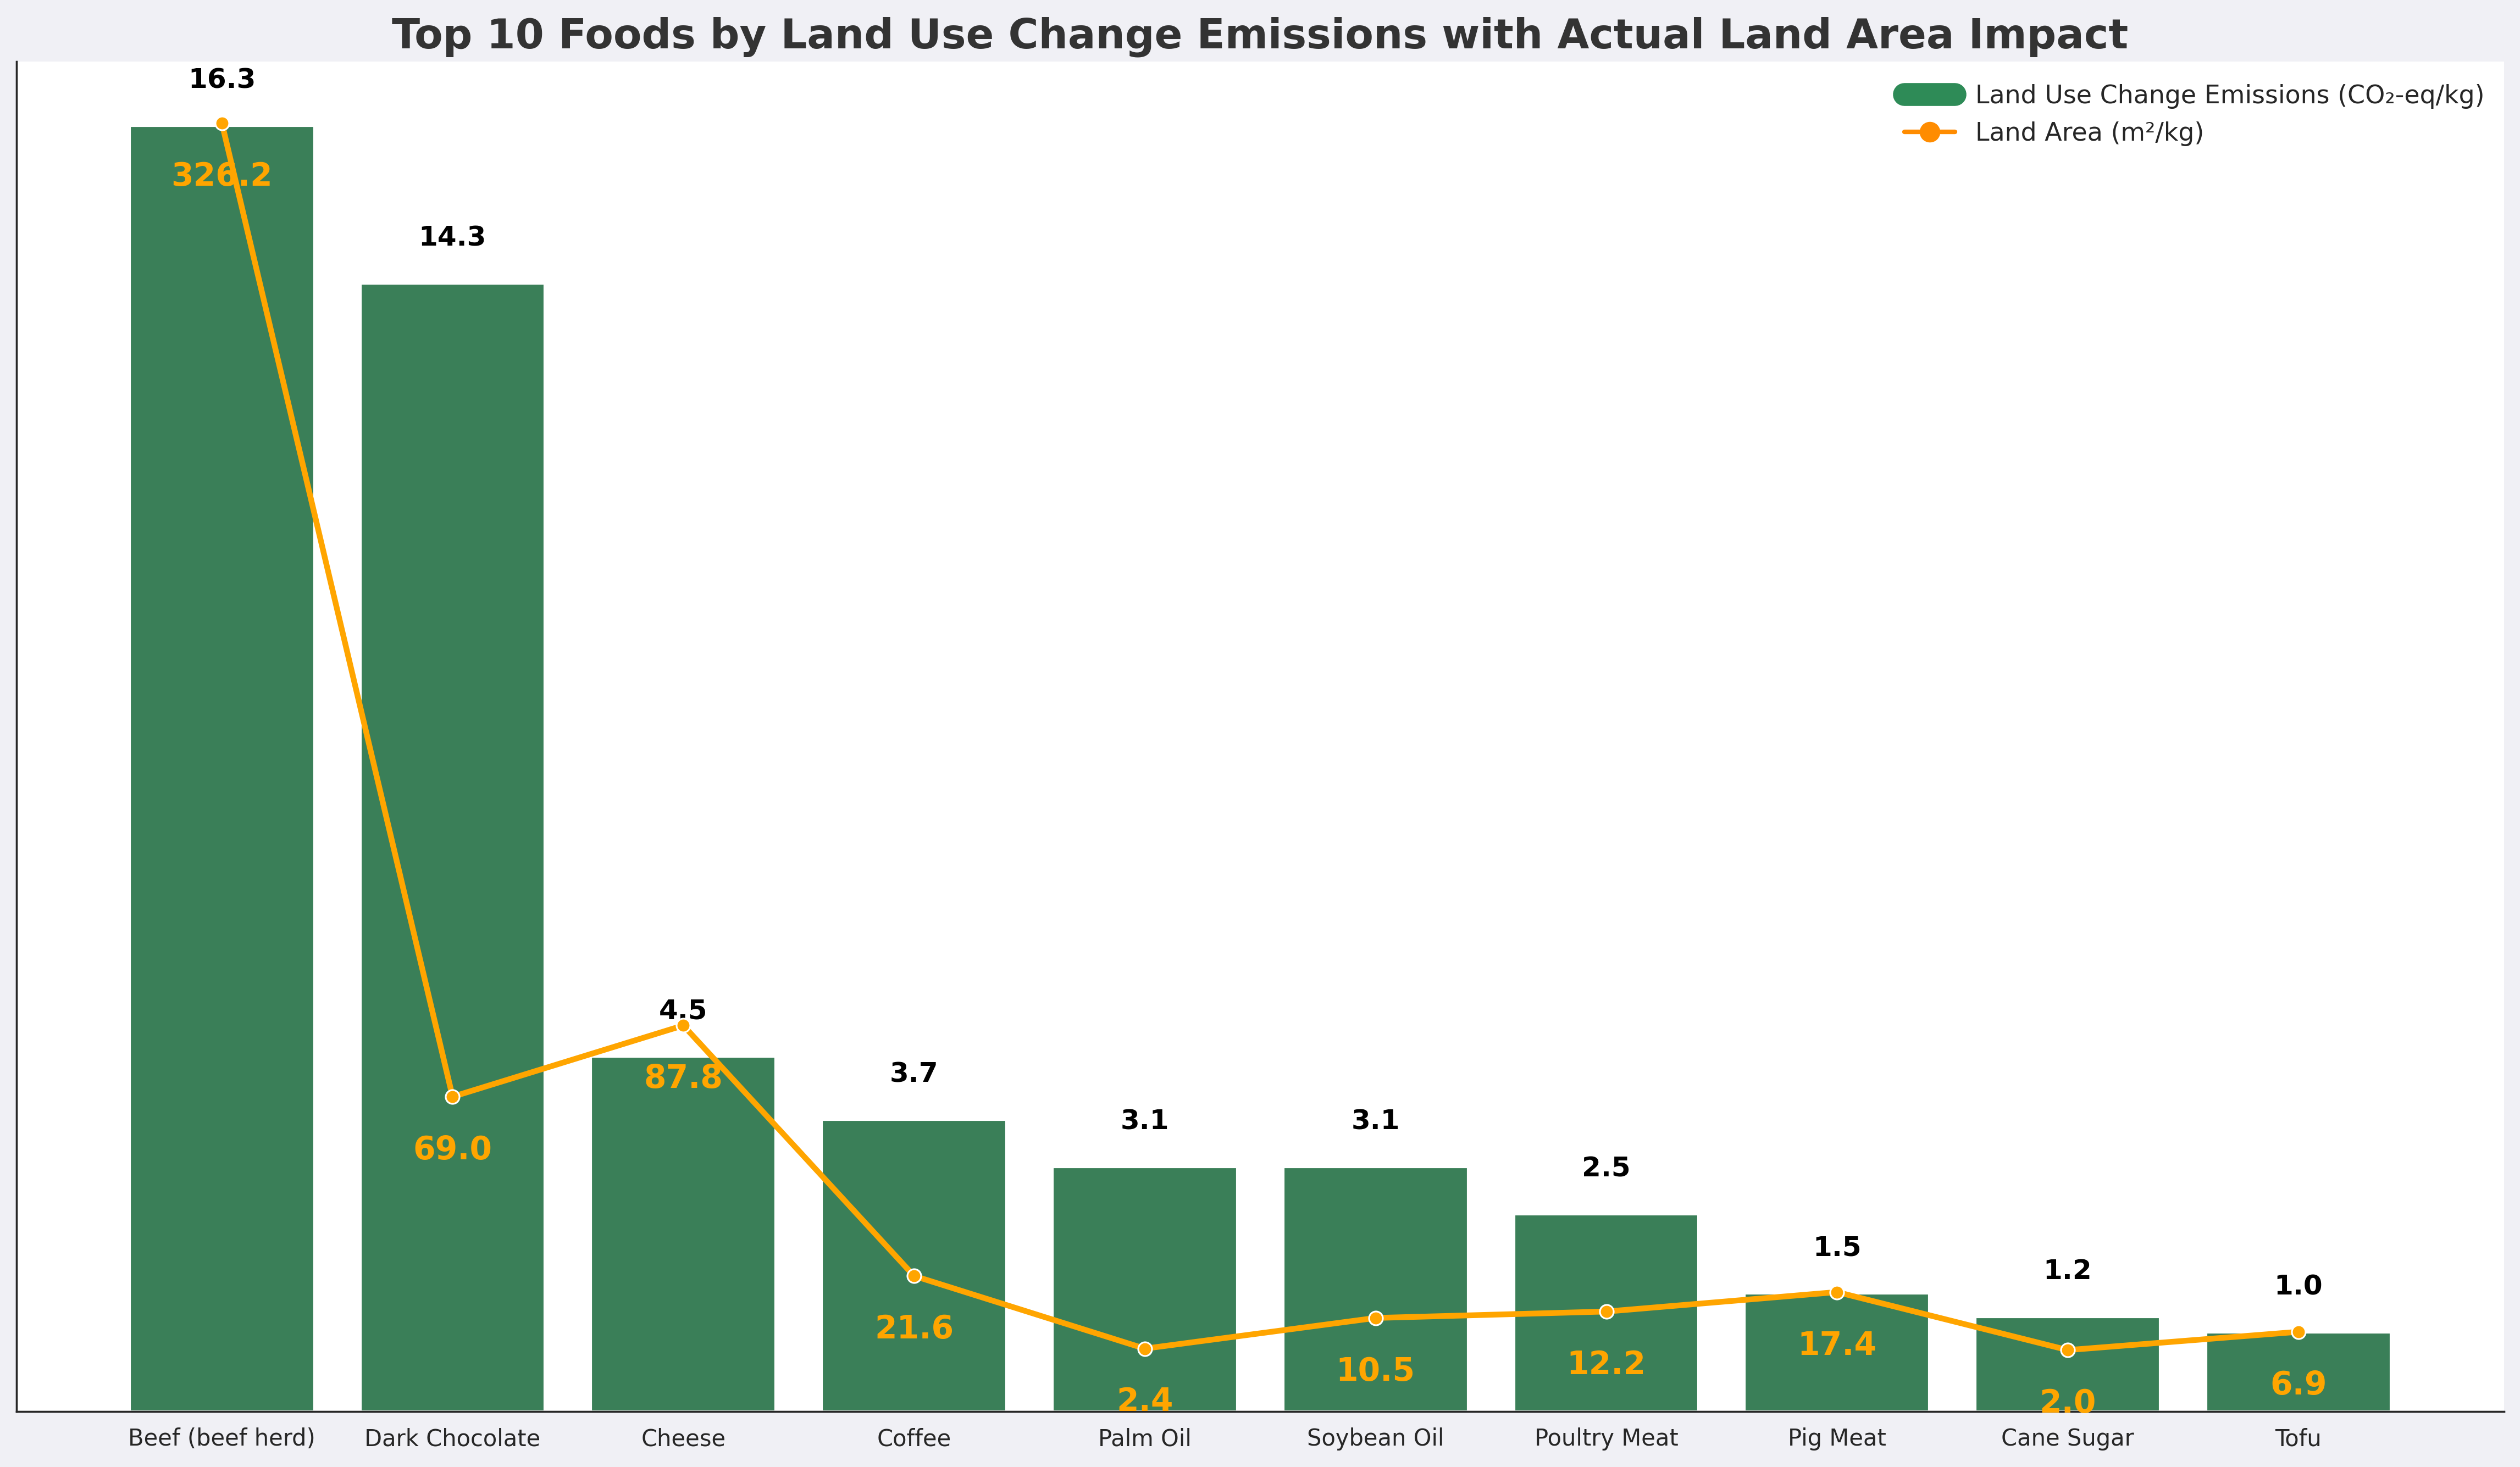

Correlation between Land Use Change Emissions and Land Area: 0.54


In [ ]:
# Columns
land_col = 'land_use_change'
land_area_col = 'land_use_per_kilogram_m²_per_kilogram'

# Top 10 foods by land use change emissions
top_land = df_cleaned[['food_product', land_col, land_area_col]] \
    .sort_values(by=land_col, ascending=False) \
    .head(10)

# Plot setup
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(16, 9), dpi=300)

# Bar plot for Land Use Change Emissions
bar = sns.barplot(
    data=top_land,
    x='food_product', y=land_col,
    color='seagreen', ax=ax1
)

# Add labels to bars
for container in bar.containers:
    bar.bar_label(container, fmt="%.1f", label_type="edge", fontsize=12, padding=14, color='black', weight='bold')

# Line plot for Land Use Area
ax2 = ax1.twinx()
line = sns.lineplot(
    data=top_land,
    x='food_product', y=land_area_col,
    color='orange', marker='o', linewidth=2.5, ax=ax2, label='Land Area (m²/kg)'
)

# Add labels to line points (offset for clarity)
for x, y in enumerate(top_land[land_area_col]):
    ax2.text(x, y - 10, f"{y:.1f}", ha='center', va='top',
             fontsize=14, color='orange', weight='bold')

# Remove clutter
ax1.grid(False)
ax2.grid(False)
ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
plt.xlabel("")
plt.xticks(rotation=45, fontsize=1, color="#000")

# Legend
bars = plt.Line2D([0], [0], color='seagreen', lw=10)
lines = plt.Line2D([0], [0], color='darkorange', marker='o', markersize=8, lw=2)
plt.legend([bars, lines], ['Land Use Change Emissions (CO₂-eq/kg)', 'Land Area (m²/kg)'],
           fontsize=11, loc='upper left', bbox_to_anchor=(0.75, 1), frameon=False)

# Title & Style
plt.title("Top 10 Foods by Land Use Change Emissions with Actual Land Area Impact",
          fontsize=18, weight='bold', color='#333')
plt.gca().set_facecolor('#fafafa')
plt.gcf().set_facecolor('#f0f0f5')
sns.despine()

# Save & Show
plt.tight_layout()
plt.savefig(working_dir + "/top10_land_use_change_vs_land_area.png", dpi=300, bbox_inches='tight')
plt.show()

# Correlation between land use change emissions and land area (m²/kg)
correlation = df_cleaned['land_use_change'].corr(
    df_cleaned['land_use_per_kilogram_m²_per_kilogram']
)

print(f"Correlation between Land Use Change Emissions and Land Area: {correlation:.2f}")


•	Beef and dark chocolate exert disproportionately high land use emissions, making them critical targets for sustainable interventions.

•	Shifting consumption towards plant-based, low-footprint foods can significantly reduce pressure on land resources.


### **4. At which stage of the food lifecycle (farm, processing, transport, packaging, retail) do emissions peak for most food products?**

/tmp/ipython-input-1830101149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


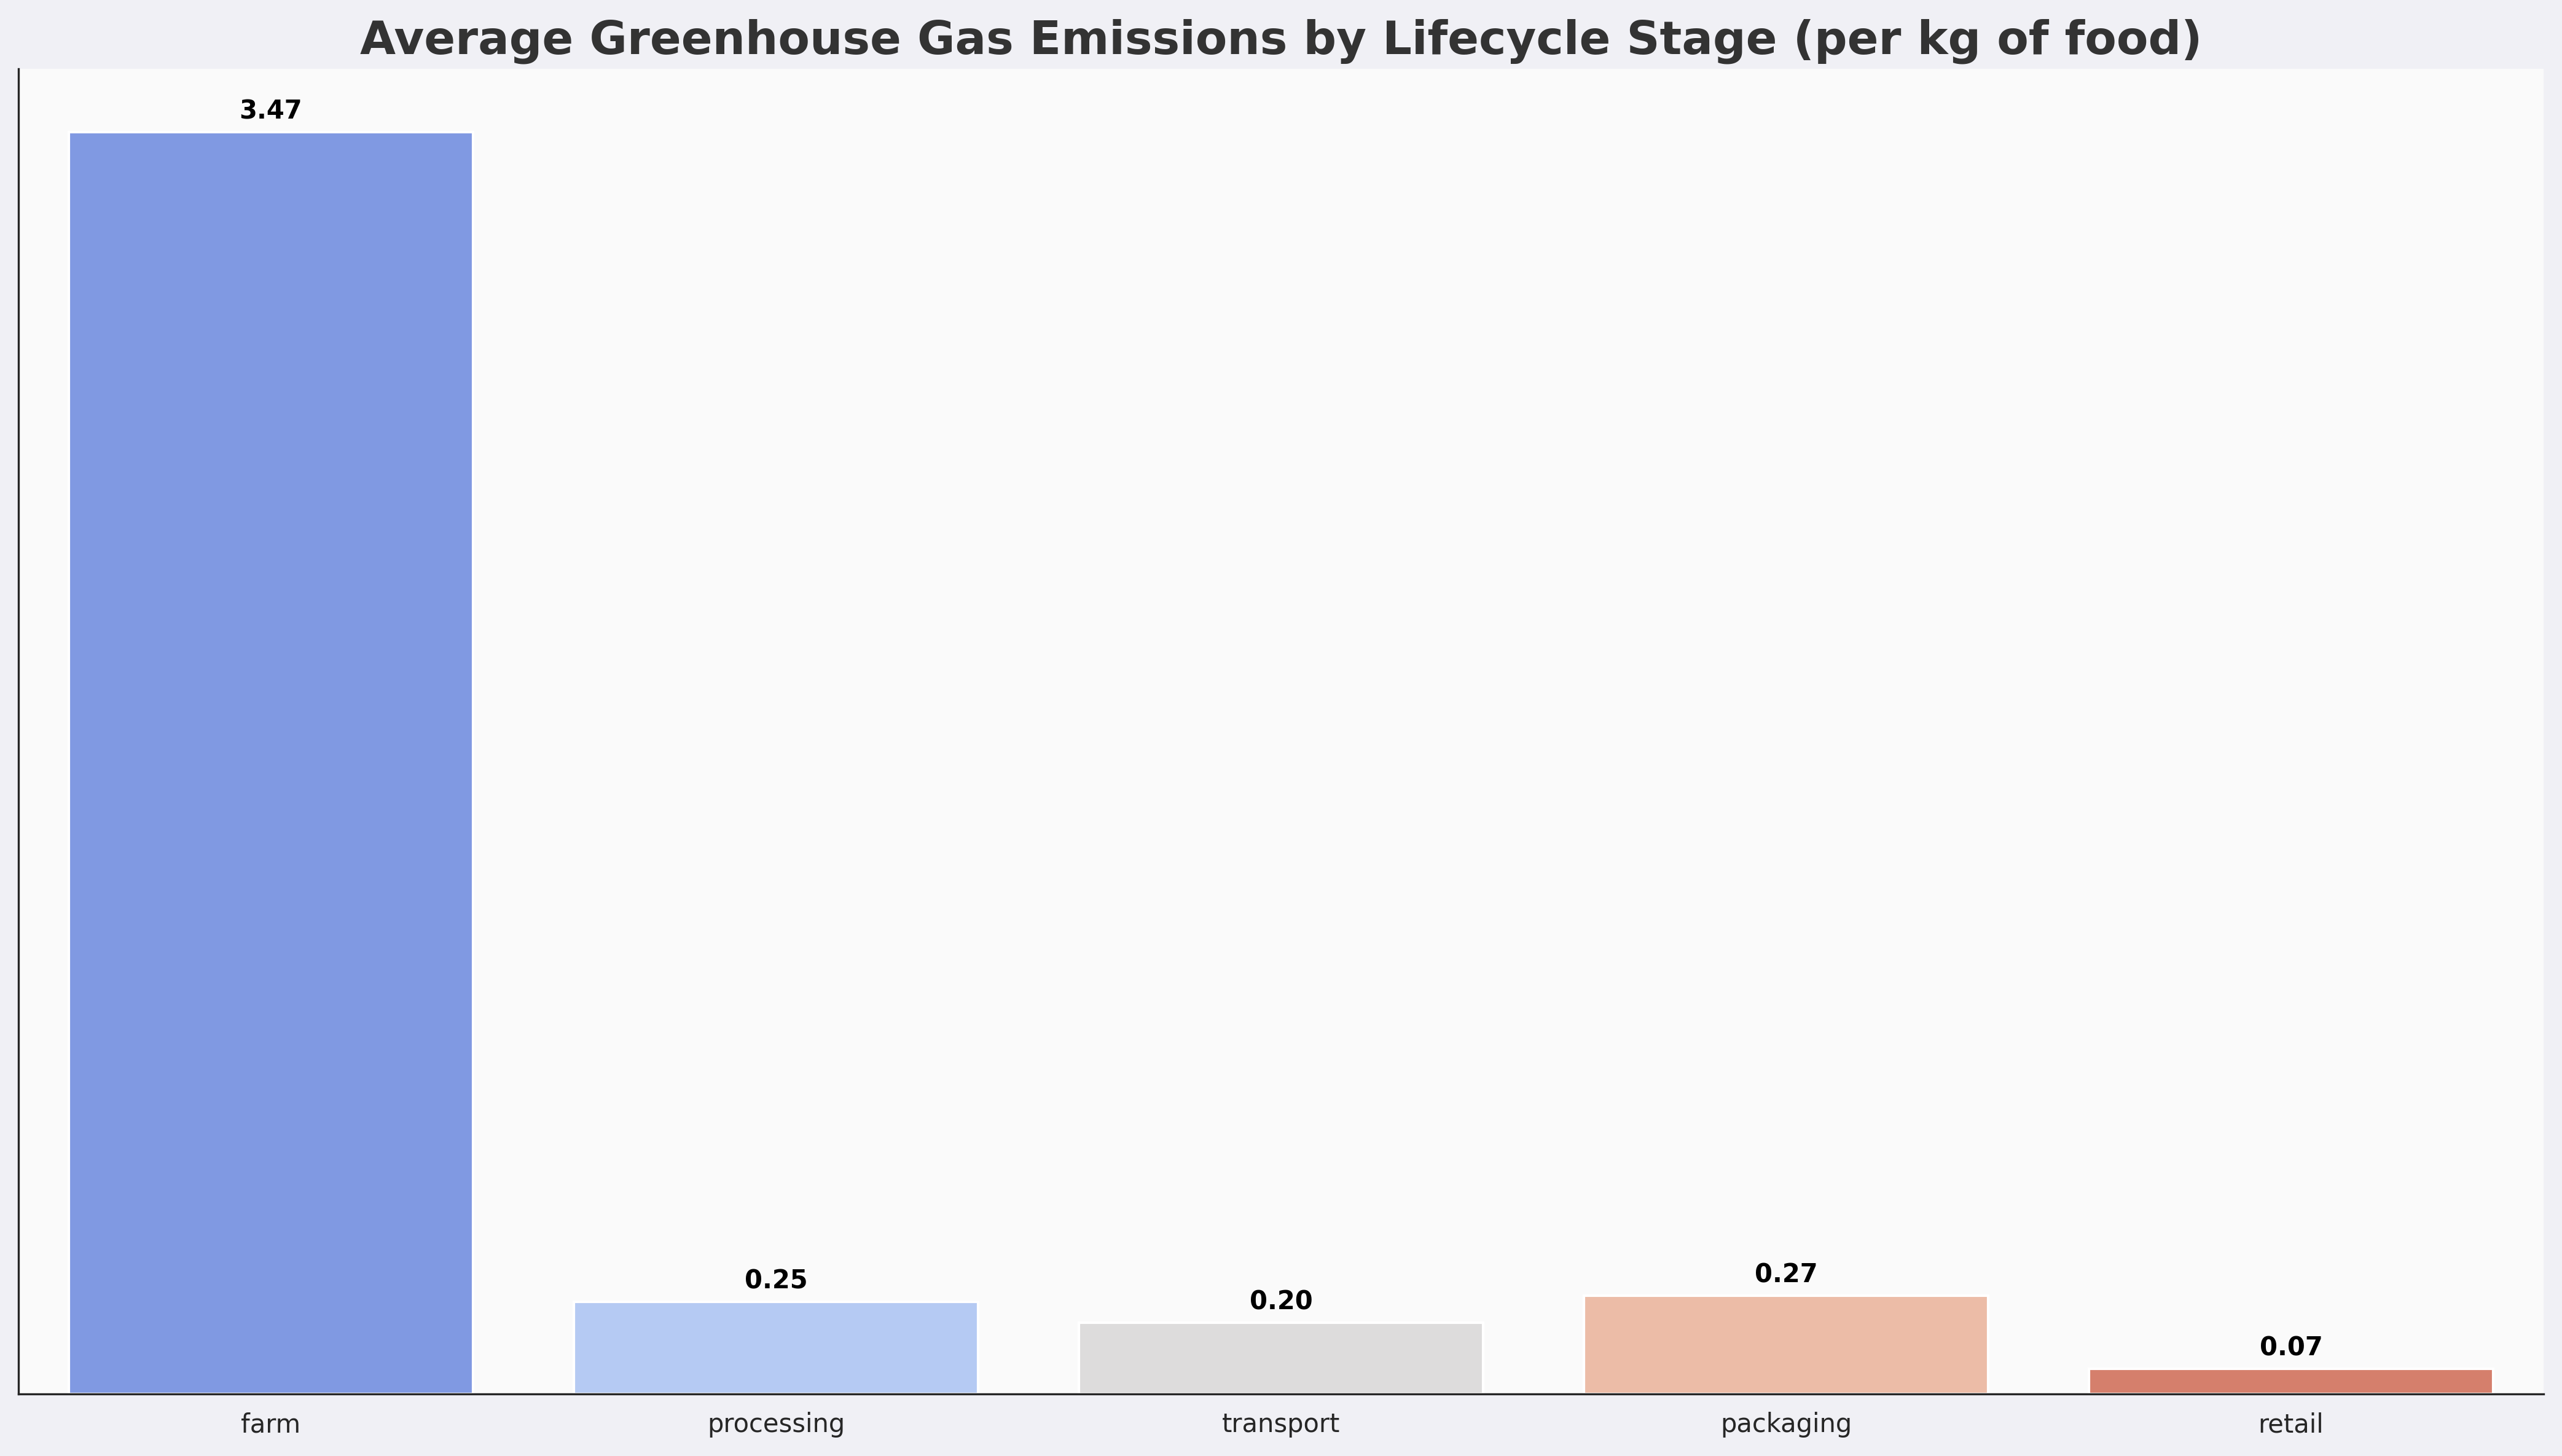

In [ ]:
# Columns for lifecycle stages
stages = ['farm', 'processing', 'transport', 'packaging', 'retail']

# Calculate average emissions per stage
stage_means = df_cleaned[stages].mean().reset_index()
stage_means.columns = ['Stage', 'Average Emissions (CO₂-eq/kg)']
# stage_means = stage_means.sort_values(by='Average Emissions (CO₂-eq/kg)', ascending=False)

# Plot
sns.set_style("white")
plt.figure(figsize=(14, 8), dpi=300)

bar = sns.barplot(
    data=stage_means,
    x='Stage', y='Average Emissions (CO₂-eq/kg)',
    palette='coolwarm'
)

# Add labels
for container in bar.containers:
    bar.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3, color='black', weight='bold')

# Style
plt.grid(False)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.title("Average Greenhouse Gas Emissions by Lifecycle Stage (per kg of food)",
          fontsize=18, weight='bold', color='#333')

# Legend substitute
plt.legend([],[], frameon=False)
plt.gca().set_facecolor('#fafafa')
plt.gcf().set_facecolor('#f0f0f5')
sns.despine()

# Save & Show
plt.tight_layout()
plt.savefig(working_dir + "/avg_emissions_by_lifecycle_stage.png", dpi=300, bbox_inches='tight')
plt.show()


•	Over 80% of food-related emissions occur at the farm stage, making it the critical focus for sustainability interventions.

•	Downstream stages like transport, packaging, and retail have minimal overall impact compared to agriculture.


### **5. Can we rank foods from “most sustainable” to “least sustainable” based on combined emissions, water, and land use?**

/tmp/ipython-input-2747347716.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


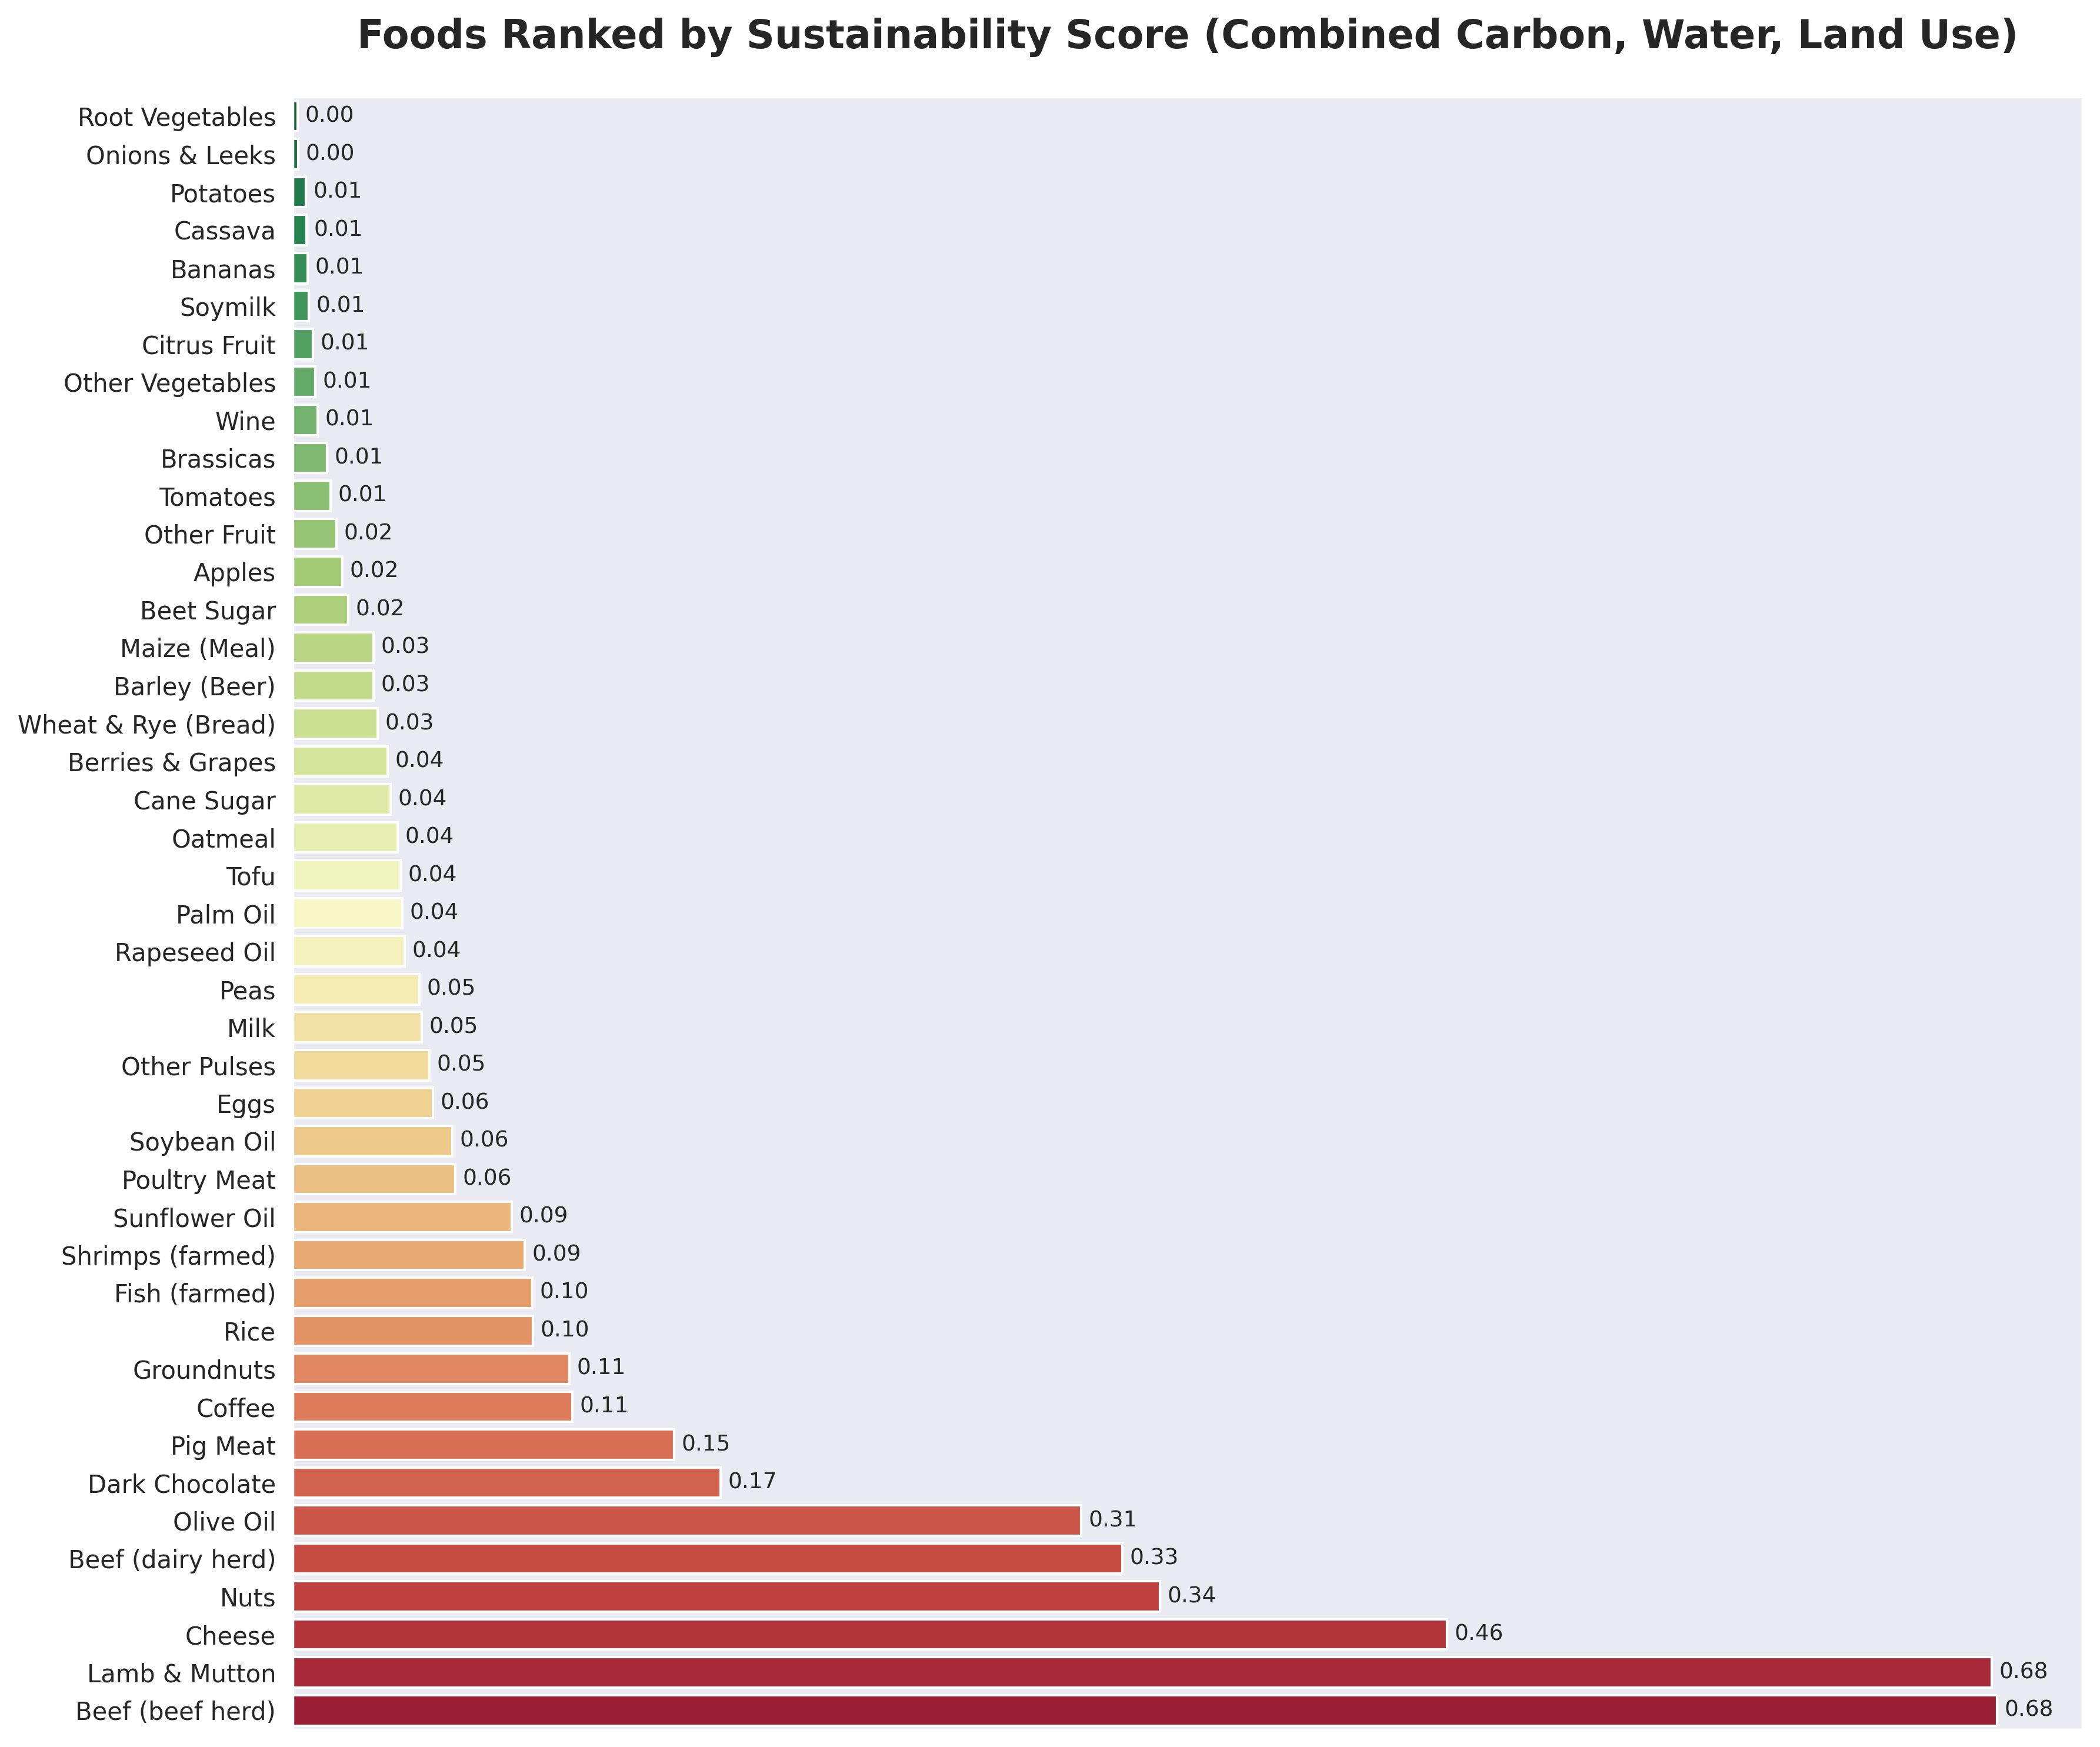

In [ ]:
# Select columns
cols = [
    'food_product',
    'total_emissions',
    'scarcityweighted_water_use_per_kilogram_liters_per_kilogram',
    'land_use_per_kilogram_m²_per_kilogram'
]

df_rank = df_cleaned[cols].copy()
df_rank.columns = ['food', 'carbon_emissions', 'water_use', 'land_use']

# Scale values to 0–1
scaler = MinMaxScaler()
df_rank[['carbon_scaled', 'water_scaled', 'land_scaled']] = scaler.fit_transform(
    df_rank[['carbon_emissions', 'water_use', 'land_use']]
)

# Calculate composite sustainability score
df_rank['sustainability_score'] = df_rank[['carbon_scaled', 'water_scaled', 'land_scaled']].mean(axis=1)

# Rank foods
df_rank = df_rank.sort_values('sustainability_score', ascending=True).reset_index(drop=True)

# Plot leaderboard
plt.figure(figsize=(12, 10), dpi=300)
sns.set_style("darkgrid")

# Create color palette
colors = sns.color_palette("RdYlGn_r", len(df_rank))  # Red (worst) → Green (best)

bar = sns.barplot(
    data=df_rank,
    x='sustainability_score',
    y='food',
    palette=colors
)

# Add data labels
for container in bar.containers:
    bar.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9, padding=3)

# Titles and formatting
plt.title("Foods Ranked by Sustainability Score (Combined Carbon, Water, Land Use)",
          fontsize=16, weight='bold', pad=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()
plt.savefig(working_dir + "/most_sustainable_&_least_sustainable_foods.png", dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipython-input-767507476.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


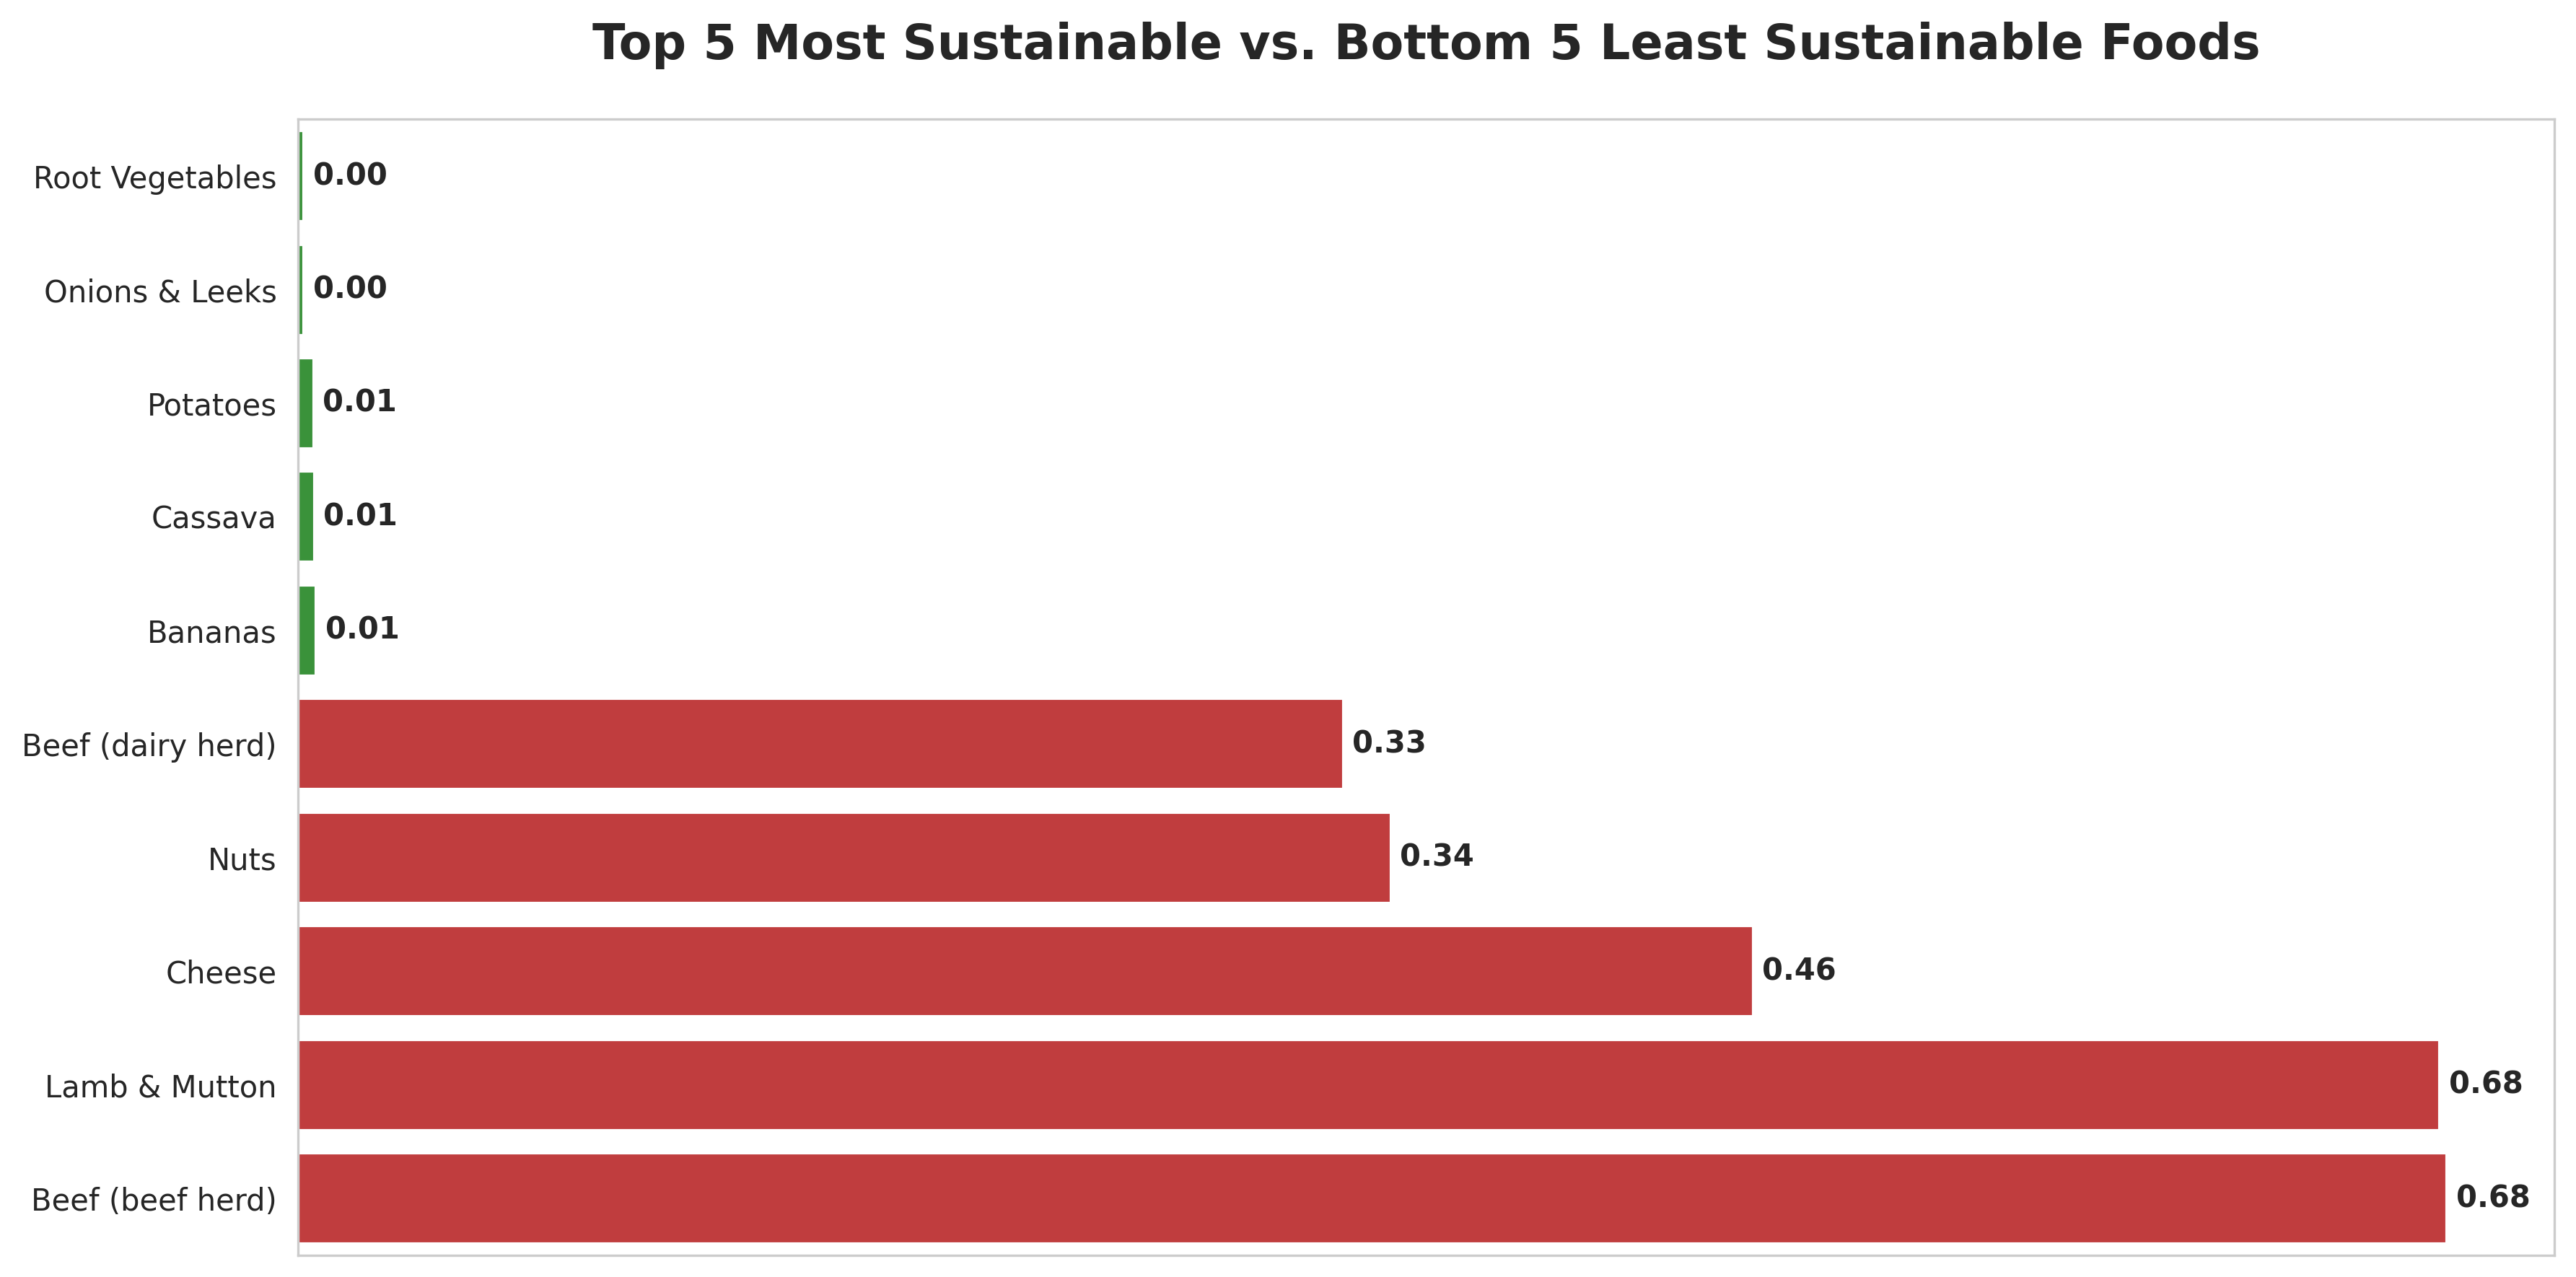

In [ ]:
# Get Top 5 and Bottom 5
top5 = df_rank.head(5)
bottom5 = df_rank.tail(5)

# Combine for plotting
top_bottom = pd.concat([top5, bottom5])

# Set up the figure
plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")

# Color palette: Green for top, Red for bottom
colors = ['#2ca02c']*5 + ['#d62728']*5  # 5 greens, 5 reds

bar = sns.barplot(
    data=top_bottom,
    x='sustainability_score',
    y='food',
    palette=colors
)

# Add data labels
for container in bar.containers:
    bar.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3, weight='bold')

# Titles and formatting
plt.title("Top 5 Most Sustainable vs. Bottom 5 Least Sustainable Foods",
          fontsize=16, weight='bold', pad=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.tight_layout()
plt.savefig(working_dir + "/top5_vs_bottom5_sustainable_foods.png", dpi=300, bbox_inches='tight')
plt.show()

•	Plant-based foods are consistently more sustainable, showing minimal carbon, water, and land impact.

•	Beef, lamb, and dairy products are environmental hotspots, offering the biggest opportunity for footprint reduction.


### **6. How do animal-based products compare to plant-based products in terms of overall environmental footprint?**

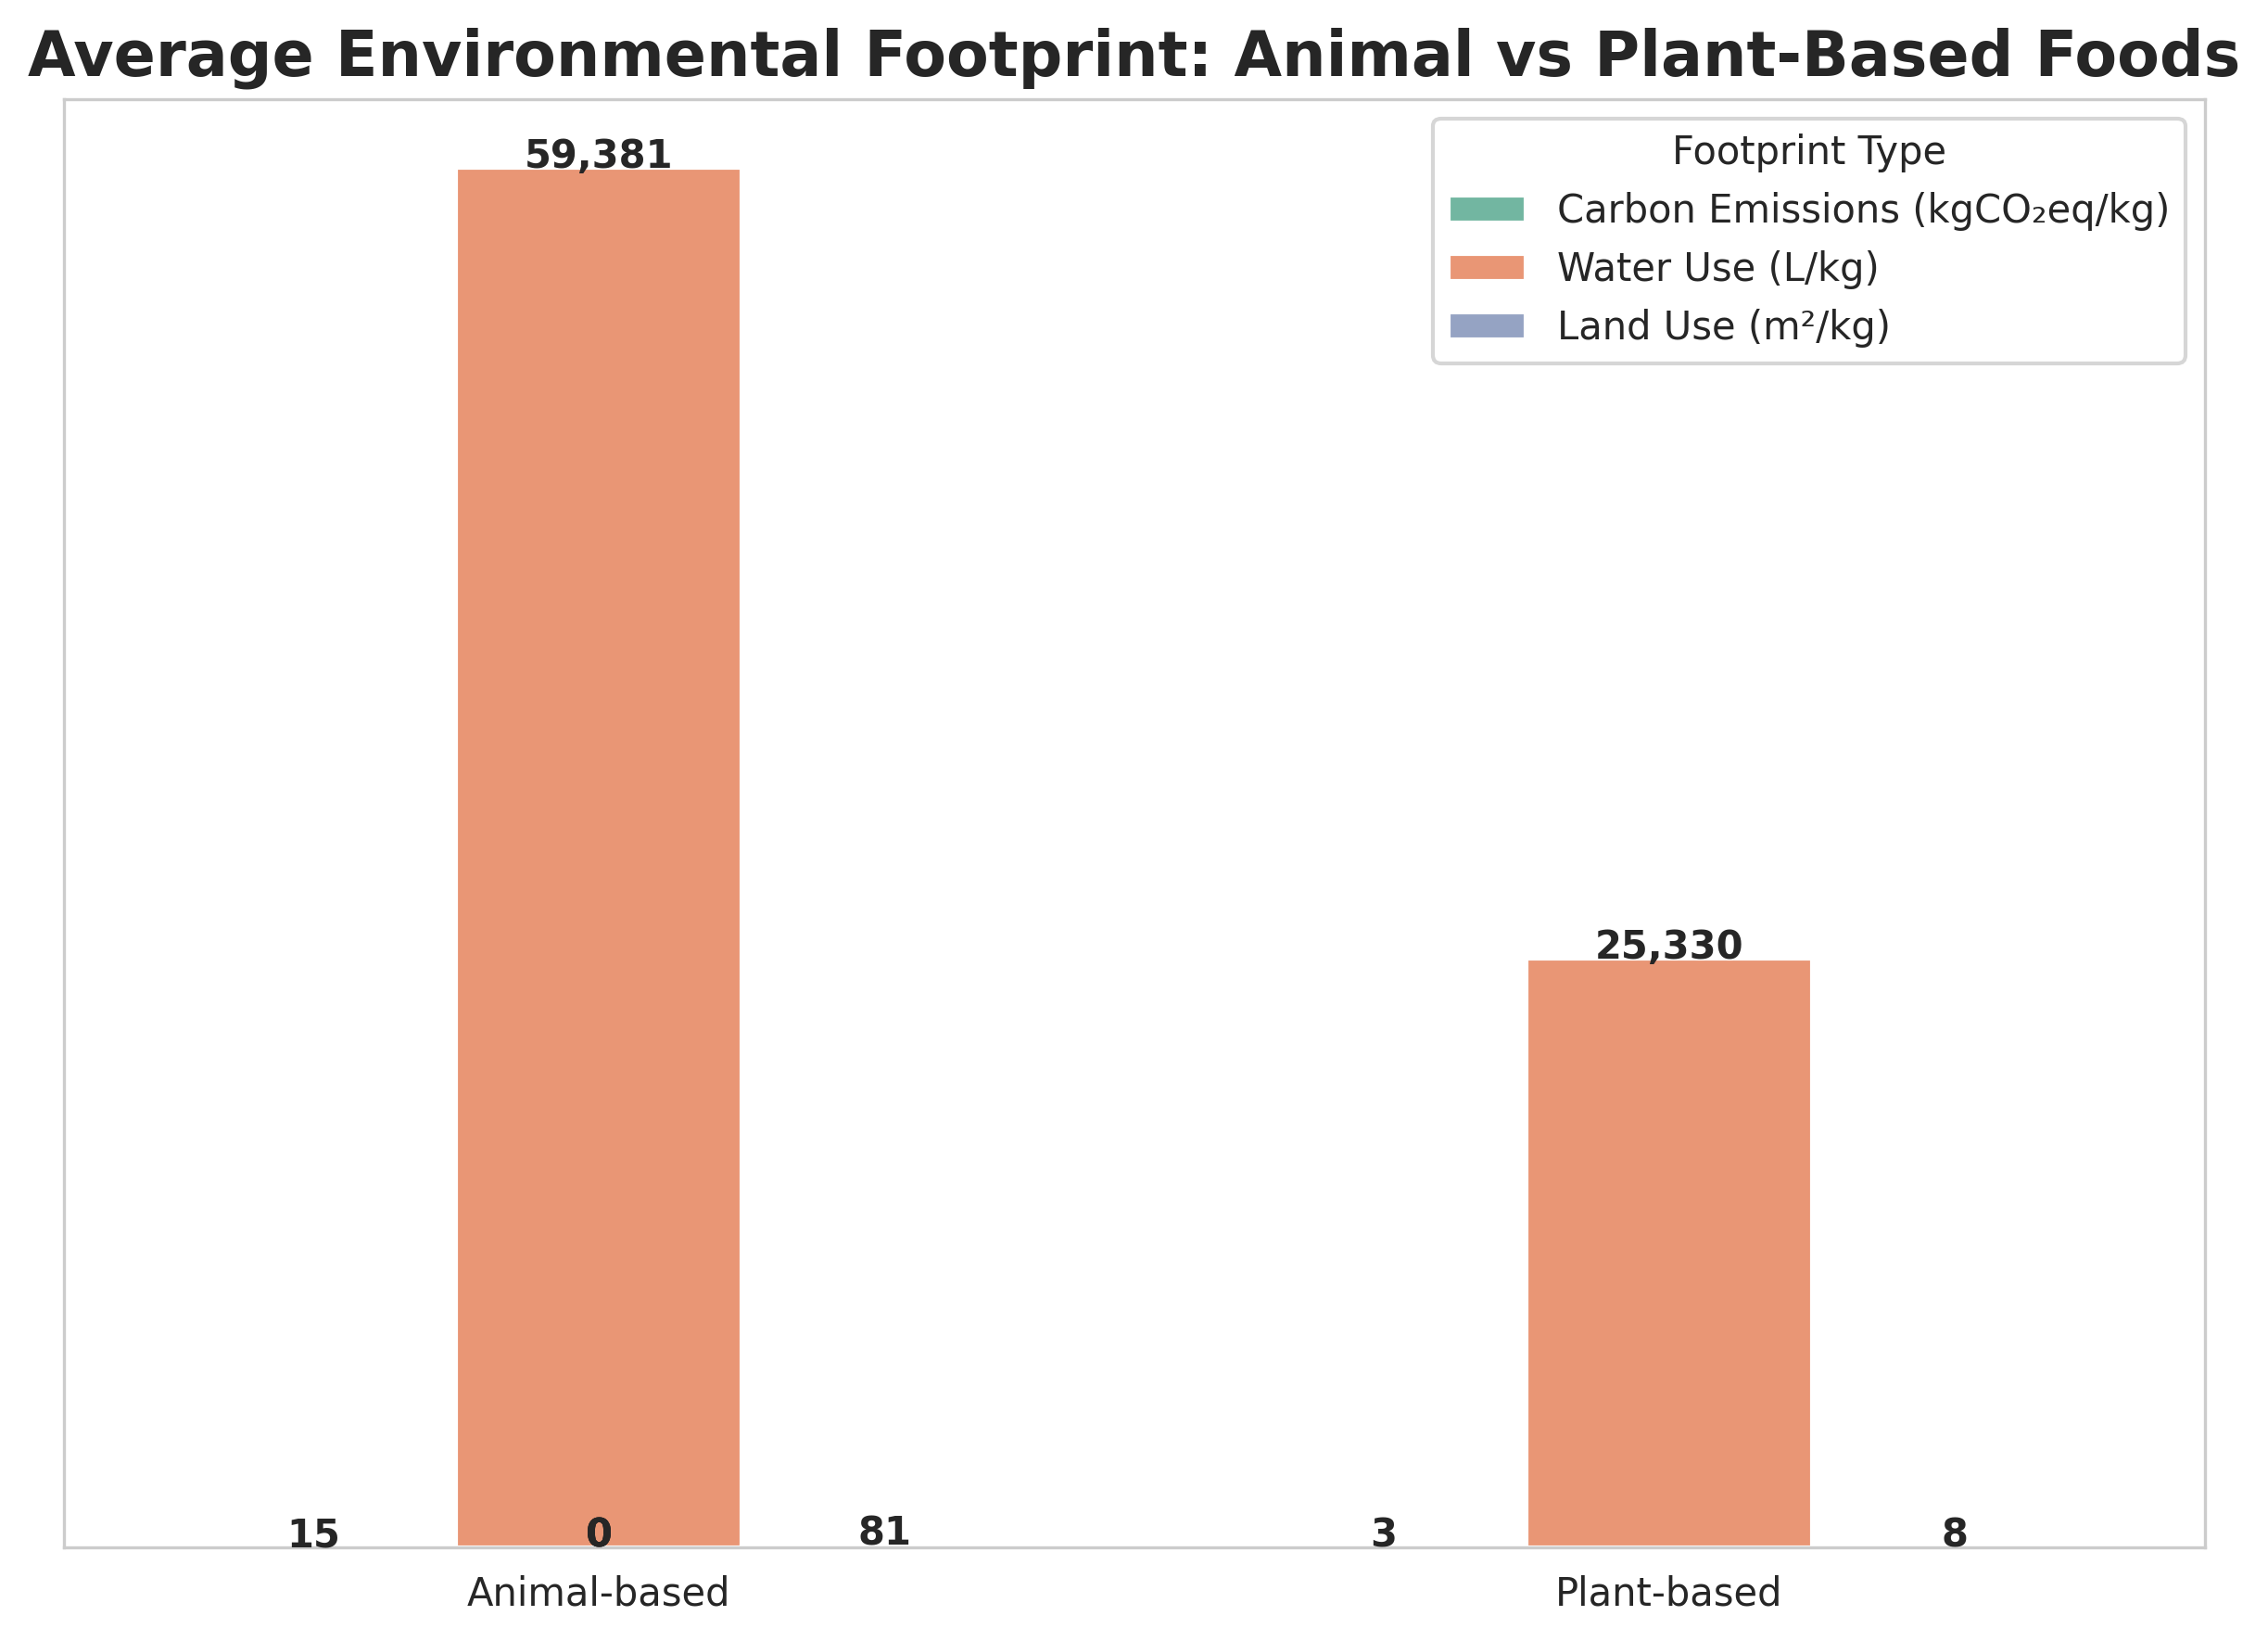

In [ ]:
# Categorize foods into Animal vs Plant-based
animal_keywords = ['beef', 'lamb', 'mutton', 'pig', 'poultry', 'fish', 'shrimp', 'milk', 'cheese', 'egg']
df_group = df_cleaned.copy()
df_group['category'] = df_group['food_product'].str.lower().apply(
    lambda x: 'Animal-based' if any(kw in x for kw in animal_keywords) else 'Plant-based'
)

# Select footprint columns and rename
df_group = df_group.rename(columns={
    'total_emissions': 'Carbon Emissions (kgCO₂eq/kg)',
    'scarcityweighted_water_use_per_kilogram_liters_per_kilogram': 'Water Use (L/kg)',
    'land_use_per_kilogram_m²_per_kilogram': 'Land Use (m²/kg)'
})

# Group by category
avg_footprints = df_group.groupby('category')[
    ['Carbon Emissions (kgCO₂eq/kg)', 'Water Use (L/kg)', 'Land Use (m²/kg)']
].mean().reset_index()

# Melt for plotting
avg_footprints_melted = avg_footprints.melt(
    id_vars='category', var_name='Footprint Type', value_name='Average Value'
)

# Plot
plt.figure(figsize=(8, 6), dpi=300)
sns.set_style("whitegrid")

bar = sns.barplot(
    data=avg_footprints_melted,
    x='category', y='Average Value', hue='Footprint Type',
    palette='Set2'
)

# Add labels above bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():,.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', fontsize=10, weight='bold')

# Title & formatting
plt.title("Average Environmental Footprint: Animal vs Plant-Based Foods", fontsize=16, fontweight='bold')
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.legend(title="Footprint Type", fontsize=10)
plt.tight_layout()
plt.savefig(working_dir + "/avg_footprint_animal_vs_plant.png", dpi=300, bbox_inches='tight')
plt.show()

•	Animal-based foods have more than double the environmental footprint of plant-based foods.

•	Shifting towards plant-based diets can meaningfully reduce overall resource use and emissions.
